In [1]:
#!pip install pysentimiento==0.7.2

In [1]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


2023-12-07 11:41:32.466346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [3]:
#Hate Speech(feminismo)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [6]:
hate_speech_analyzer.predict('igualdad feminista pueden pegar hombr hombr pued pegar')

AnalyzerOutput(output=[], probas={hateful: 0.326, targeted: 0.013, aggressive: 0.065})

In [7]:
analyzer.predict('igualdad feminista pueden pegar hombr hombr pued pegar')

AnalyzerOutput(output=NEU, probas={NEU: 0.502, NEG: 0.437, POS: 0.061})

In [4]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_feminismo_procesado.csv')

In [9]:
df['comment_stem'][0]

'viva machismo'

In [11]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [12]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,V8gDOj2V6Wo,UCHod-i12nNNdYtTJIqeXRLA,Viva el machismo,viva machismo,[0. 0. 0. ... 0. 0. 0.],0.0
1,1,V8gDOj2V6Wo,UCEIylx-a-CPhMnXNUxv_LNA,"Hay que amar a las mujeres y tratarlas como tal,",amar mujer tratarla,[0. 0. 0. ... 0. 0. 0.],1.0
2,2,V8gDOj2V6Wo,UC3IJ88t0um1drra78GUSNLg,Feminismo es una palabra para referirse a una ...,feminismo palabra referirs mujer rasgo movimie...,[0. 0. 0. ... 0. 0. 0.],0.0
3,3,V8gDOj2V6Wo,UCx71QVpr8WRY2HIALeabUzw,Es que la verdad el feminismo ya no busca igua...,verdad feminismo busca igualdad busca derecho ...,[0. 0. 0. ... 0. 0. 0.],0.0
4,4,V8gDOj2V6Wo,UC_uq4nmAsi3fFo0JOHKZ63w,Diré como dijo un sabio\nLas Mujeres solo saca...,dijo sabio mujer solo sacan bandera feminismo ...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [13]:
df['sentiment'].value_counts()

 0.0    5210
-1.0    4232
 1.0    1030
Name: sentiment, dtype: int64

In [14]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
4,4,V8gDOj2V6Wo,UC_uq4nmAsi3fFo0JOHKZ63w,Diré como dijo un sabio\nLas Mujeres solo saca...,dijo sabio mujer solo sacan bandera feminismo ...,[0. 0. 0. ... 0. 0. 0.],-1.0
8,8,V8gDOj2V6Wo,UCqm9U-VBVJQ9Zp0KCwK8hFA,Tiene razón. Ella defiende en igualdad de la m...,defiend igualdad mujer desprecia feminismo rad...,[0. 0. 0. ... 0. 0. 0.],-1.0
12,12,V8gDOj2V6Wo,UC4wouUxcJ4UL7LpbHgJ0kEA,Jamas va prejudicar a las mujeres al contrario...,jama prejudicar mujer contrario benediciar hom...,[0. 0. 0. ... 0. 0. 0.],-1.0
13,13,V8gDOj2V6Wo,UCIdVhVzoqFa3t1zVhD5AM3g,Yo lo llamo como Agustín L.\nFeminazis,llamo agust feminazi,[0. 0. 0. ... 0. 0. 0.],-1.0
16,16,V8gDOj2V6Wo,UCdH17vlVLUyjUgs_PMJeO0w,El feminismo surge tb como un movimiento de cl...,feminismo surg movimiento clase frent abuso ca...,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
10790,10790,N6uyDEZLvQc,UCLyv0WTnuFDm5qM-516gvEw,A todos nos valen madre las feministas 😅,valen madr feminista,[0. 0. 0. ... 0. 0. 0.],-1.0
10792,10792,N6uyDEZLvQc,UCpRg_BVNly921YVV_tciBBA,"Q asco wtf\nEncima s eexcusaba con, me falto c...",asco encima eexcusaba falto cafe maldita adict...,[0. 0. 0. ... 0. 0. 0.],-1.0
10794,10794,N6uyDEZLvQc,UCScSsx9c6EnCy0N_xSShakA,XD duras verdades han dicho,dura verdad dicho,[0. 0. 0. ... 0. 0. 0.],-1.0
10795,10795,N6uyDEZLvQc,UCuX4IsGehl8iVL0nQSKdDLA,Muy whitexican para mi,whitexican,[0. 0. 0. ... 0. 0. 0.],-1.0


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

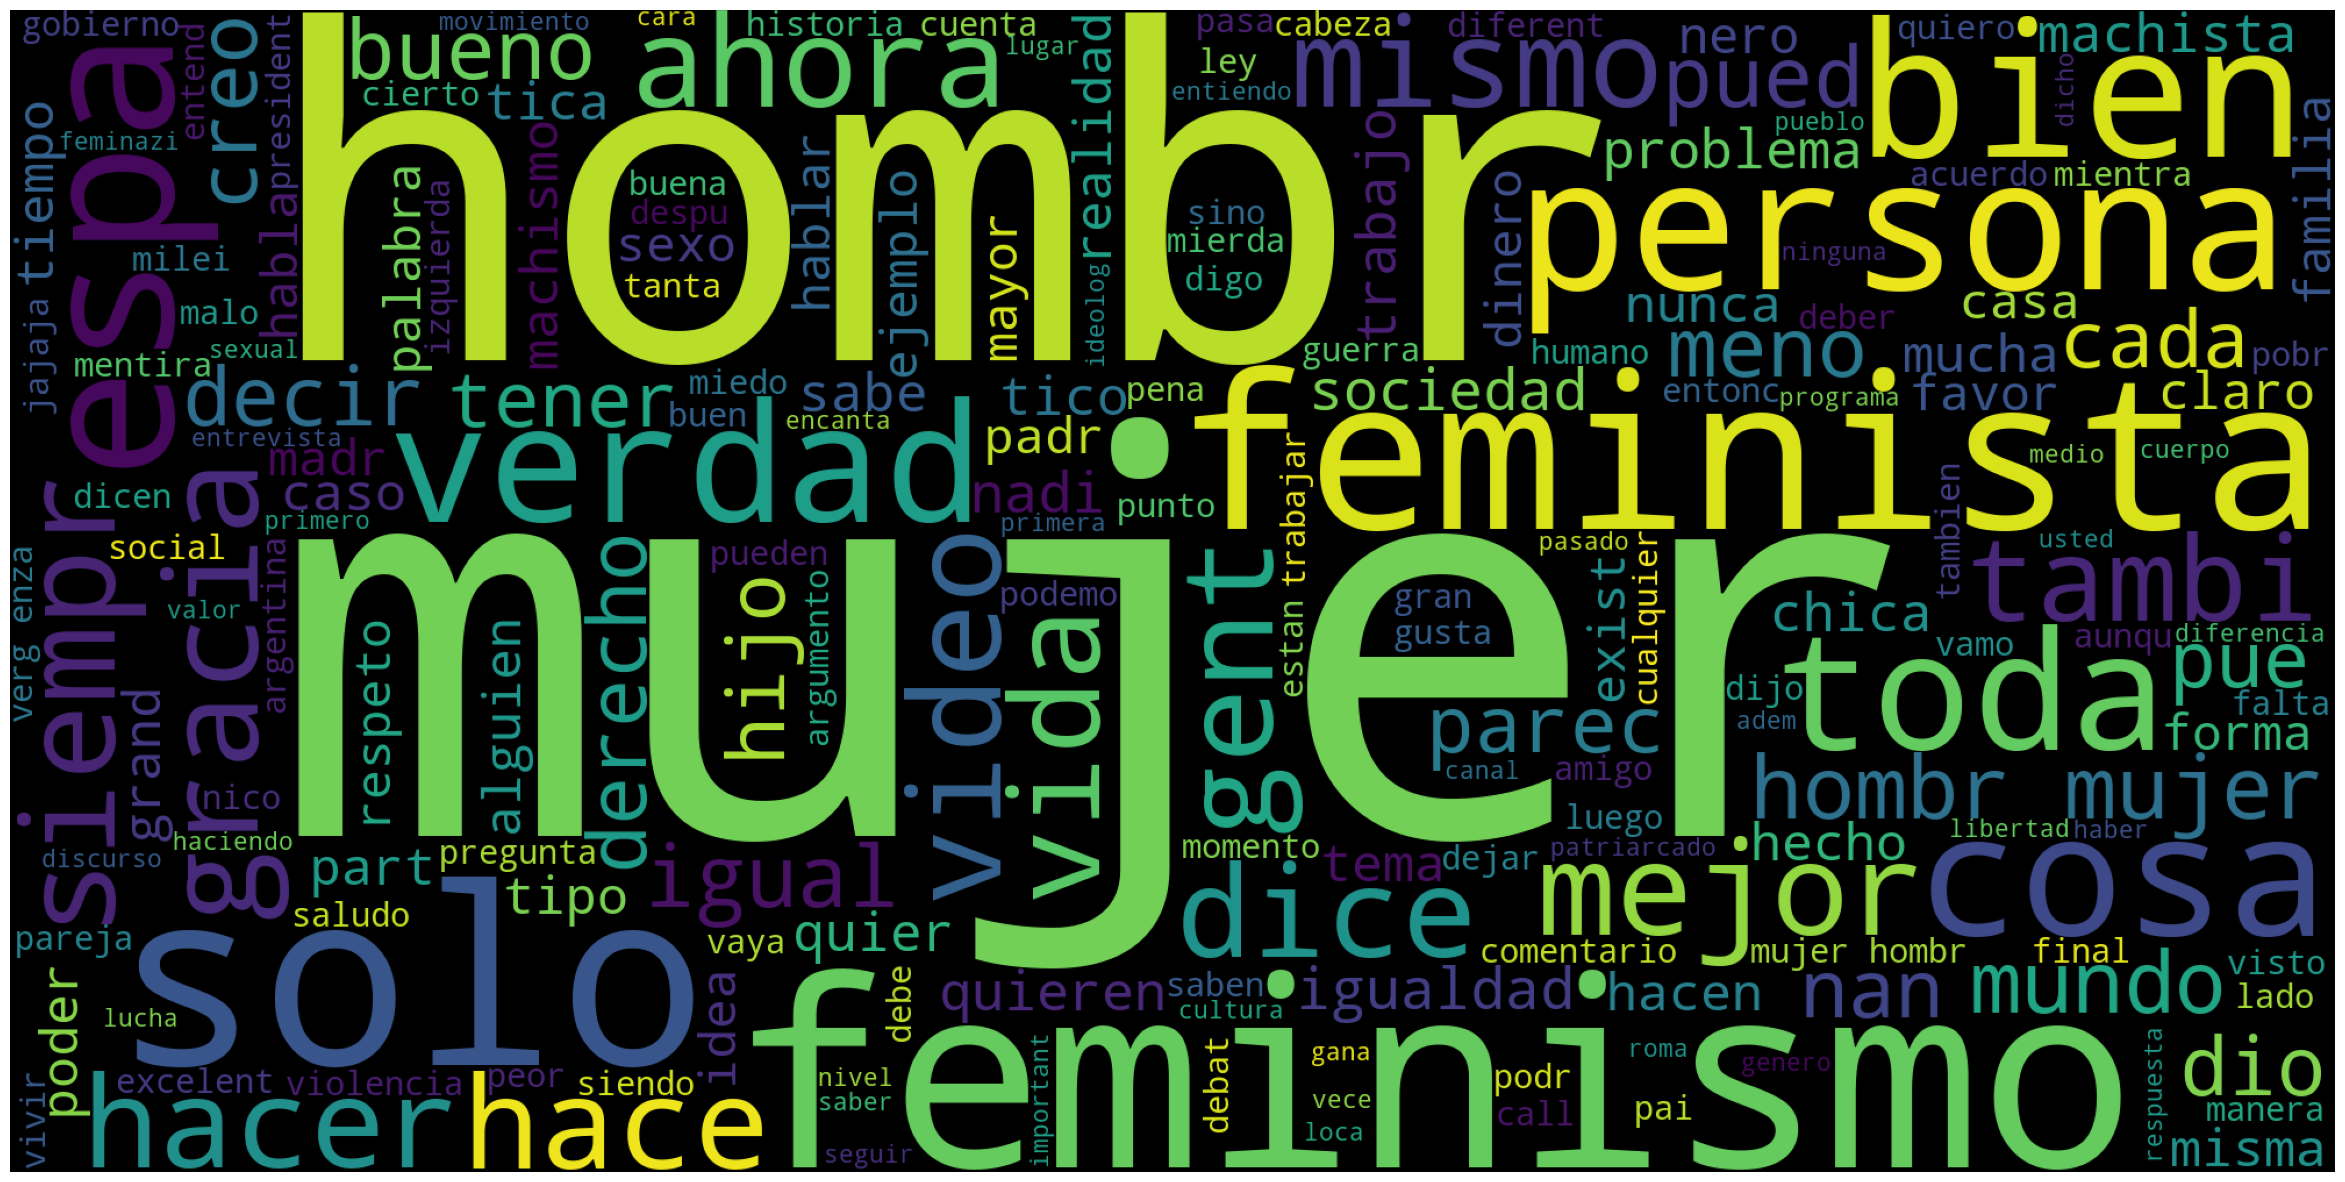

In [17]:
show_wordcloud(df,'comment_stem')

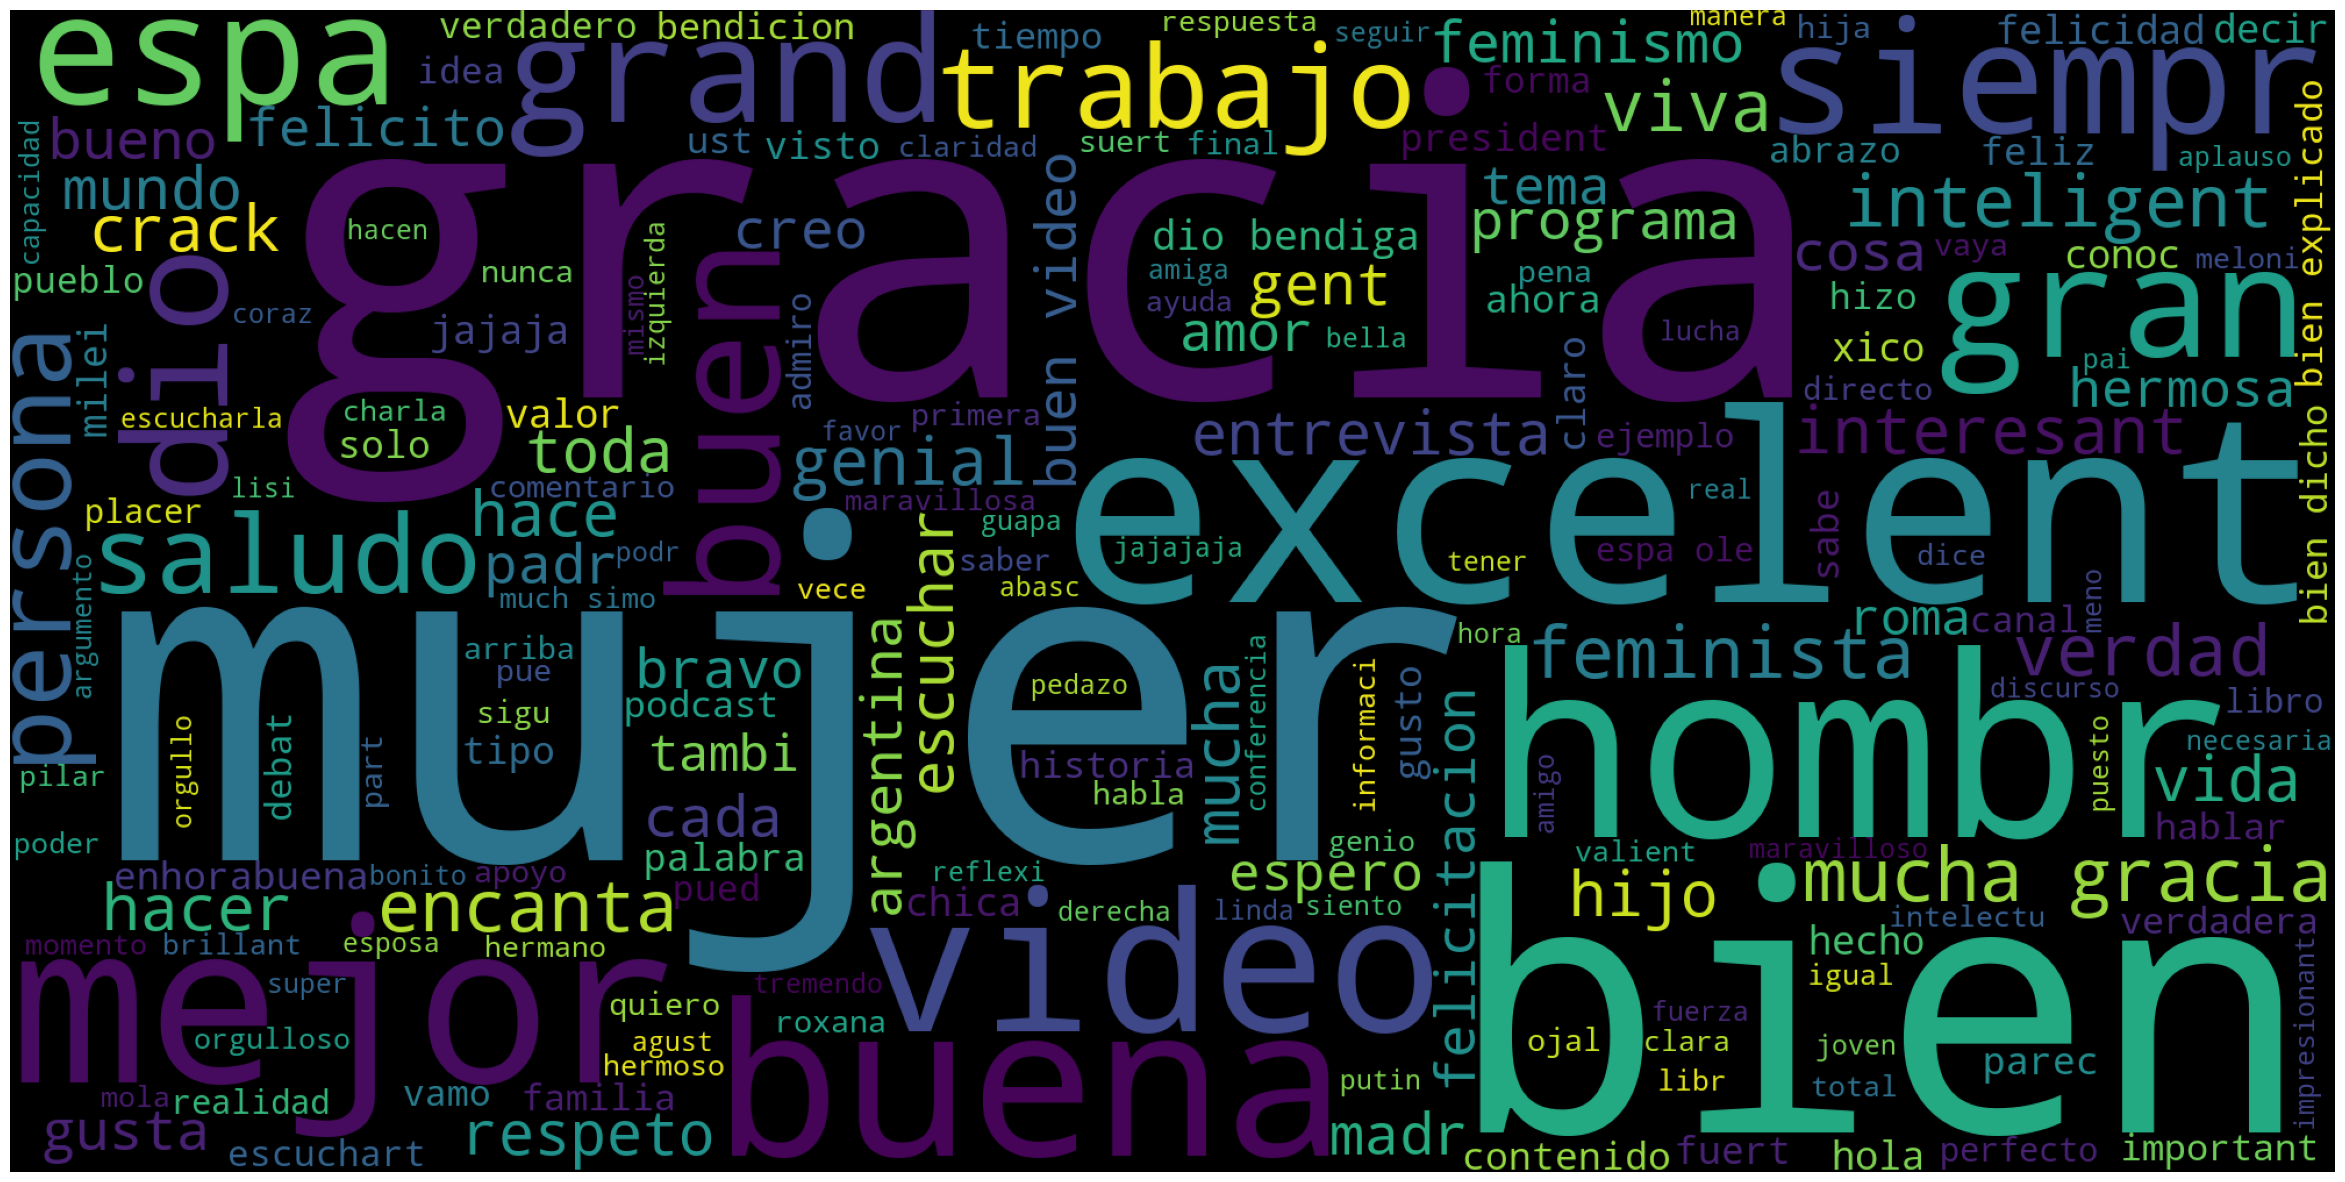

In [18]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [19]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_feminismo_sentimiento.csv')

In [20]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
4,V8gDOj2V6Wo,UC_uq4nmAsi3fFo0JOHKZ63w,Diré como dijo un sabio\nLas Mujeres solo saca...,[0. 0. 0. ... 0. 0. 0.],dijo sabio mujer solo sacan bandera feminismo ...,-1.0
8,V8gDOj2V6Wo,UCqm9U-VBVJQ9Zp0KCwK8hFA,Tiene razón. Ella defiende en igualdad de la m...,[0. 0. 0. ... 0. 0. 0.],defiend igualdad mujer desprecia feminismo rad...,-1.0
12,V8gDOj2V6Wo,UC4wouUxcJ4UL7LpbHgJ0kEA,Jamas va prejudicar a las mujeres al contrario...,[0. 0. 0. ... 0. 0. 0.],jama prejudicar mujer contrario benediciar hom...,-1.0
13,V8gDOj2V6Wo,UCIdVhVzoqFa3t1zVhD5AM3g,Yo lo llamo como Agustín L.\nFeminazis,[0. 0. 0. ... 0. 0. 0.],llamo agust feminazi,-1.0
16,V8gDOj2V6Wo,UCdH17vlVLUyjUgs_PMJeO0w,El feminismo surge tb como un movimiento de cl...,[0. 0. 0. ... 0. 0. 0.],feminismo surg movimiento clase frent abuso ca...,-1.0


In [21]:
df_neg.shape

(4232, 6)

In [22]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_feminismo_negativo.csv')

In [23]:
import pandas as pd

In [24]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_feminismo_negativo.csv')

In [25]:
df_neg.shape

(4232, 7)

In [5]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [27]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [27]:
df_neg['comment_stem'][2472]

'peor president mexico preocupa pais comunista dictador socialista nunca propio pai narcotrafico'

In [28]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [6]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [36]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [7]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [29]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [39]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,aggresive,targeted
0,4,V8gDOj2V6Wo,UC_uq4nmAsi3fFo0JOHKZ63w,Diré como dijo un sabio\nLas Mujeres solo saca...,[0. 0. 0. ... 0. 0. 0.],dijo sabio mujer solo sacan bandera feminismo ...,-1.0,0.815820,0.202982,0.066783
1,8,V8gDOj2V6Wo,UCqm9U-VBVJQ9Zp0KCwK8hFA,Tiene razón. Ella defiende en igualdad de la m...,[0. 0. 0. ... 0. 0. 0.],defiend igualdad mujer desprecia feminismo rad...,-1.0,0.469248,0.069040,0.021769
2,12,V8gDOj2V6Wo,UC4wouUxcJ4UL7LpbHgJ0kEA,Jamas va prejudicar a las mujeres al contrario...,[0. 0. 0. ... 0. 0. 0.],jama prejudicar mujer contrario benediciar hom...,-1.0,0.415238,0.101776,0.018052
3,13,V8gDOj2V6Wo,UCIdVhVzoqFa3t1zVhD5AM3g,Yo lo llamo como Agustín L.\nFeminazis,[0. 0. 0. ... 0. 0. 0.],llamo agust feminazi,-1.0,0.934084,0.793431,0.878898
4,16,V8gDOj2V6Wo,UCdH17vlVLUyjUgs_PMJeO0w,El feminismo surge tb como un movimiento de cl...,[0. 0. 0. ... 0. 0. 0.],feminismo surg movimiento clase frent abuso ca...,-1.0,0.330278,0.094780,0.015117


In [40]:
df_neg.aggresive

0       0.202982
1       0.069040
2       0.101776
3       0.793431
4       0.094780
          ...   
4227    0.021024
4228    0.969846
4229    0.046239
4230    0.542443
4231    0.732115
Name: aggresive, Length: 4232, dtype: float64

In [41]:
import matplotlib.pyplot as plt

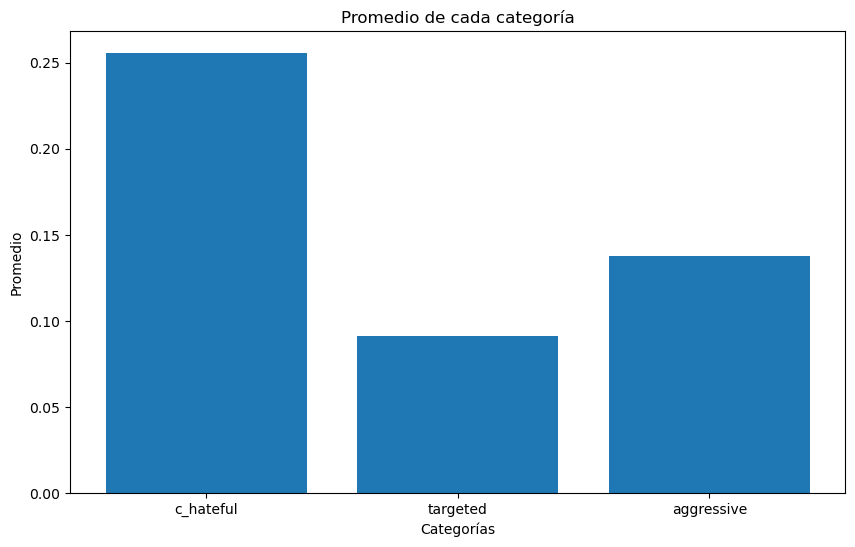

In [38]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



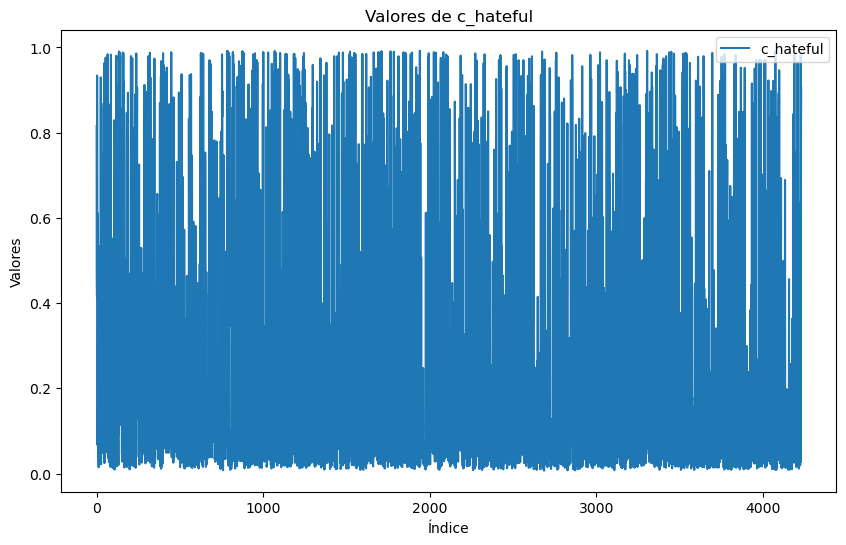

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

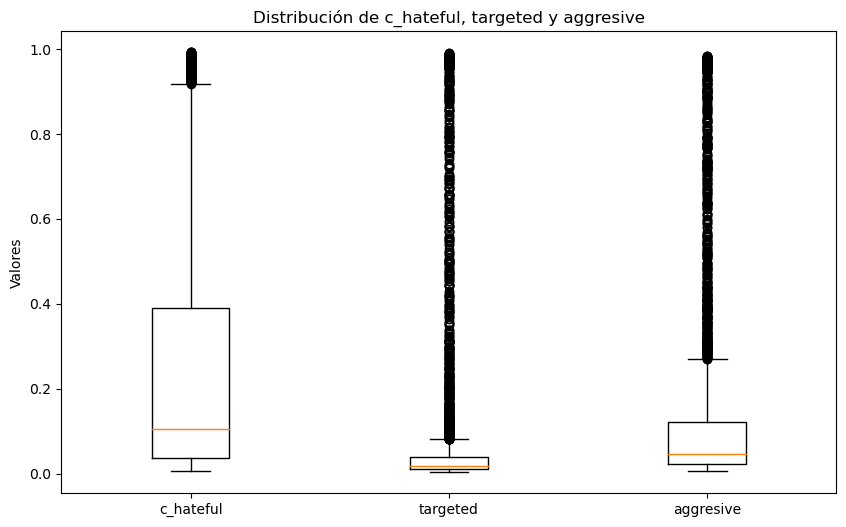

In [43]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [44]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_feminismo_ filtrados.csv')

Filtrar los neutros

In [8]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_feminismo_sentimiento.csv')

In [10]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,V8gDOj2V6Wo,UCHod-i12nNNdYtTJIqeXRLA,Viva el machismo,[0. 0. 0. ... 0. 0. 0.],viva machismo,0.0
2,V8gDOj2V6Wo,UC3IJ88t0um1drra78GUSNLg,Feminismo es una palabra para referirse a una ...,[0. 0. 0. ... 0. 0. 0.],feminismo palabra referirs mujer rasgo movimie...,0.0
3,V8gDOj2V6Wo,UCx71QVpr8WRY2HIALeabUzw,Es que la verdad el feminismo ya no busca igua...,[0. 0. 0. ... 0. 0. 0.],verdad feminismo busca igualdad busca derecho ...,0.0
5,V8gDOj2V6Wo,UChRm-4tazqB8qLZYKrVsPyg,La solucion es ovia...\n\n_hay que quitar el m...,[0. 0. 0. ... 0. 0. 0.],solucion ovia quitar ministerio mujer creal mi...,0.0
6,V8gDOj2V6Wo,UCpg4OxQpbqV5yMK9oj0pA7Q,No ala idiologia de genero,[0. 0. 0. ... 0. 0. 0.],idiologia genero,0.0


In [11]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_feminismo_neutro.csv')

In [28]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_feminismo_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,0,V8gDOj2V6Wo,UCHod-i12nNNdYtTJIqeXRLA,Viva el machismo,[0. 0. 0. ... 0. 0. 0.],viva machismo,0.0
1,2,V8gDOj2V6Wo,UC3IJ88t0um1drra78GUSNLg,Feminismo es una palabra para referirse a una ...,[0. 0. 0. ... 0. 0. 0.],feminismo palabra referirs mujer rasgo movimie...,0.0
2,3,V8gDOj2V6Wo,UCx71QVpr8WRY2HIALeabUzw,Es que la verdad el feminismo ya no busca igua...,[0. 0. 0. ... 0. 0. 0.],verdad feminismo busca igualdad busca derecho ...,0.0
3,5,V8gDOj2V6Wo,UChRm-4tazqB8qLZYKrVsPyg,La solucion es ovia...\n\n_hay que quitar el m...,[0. 0. 0. ... 0. 0. 0.],solucion ovia quitar ministerio mujer creal mi...,0.0
4,6,V8gDOj2V6Wo,UCpg4OxQpbqV5yMK9oj0pA7Q,No ala idiologia de genero,[0. 0. 0. ... 0. 0. 0.],idiologia genero,0.0
...,...,...,...,...,...,...,...
5205,10780,uD-Keydp0FE,UCkW0dNtwju7nTyNQ7nJLTDA,Lol lo volvió hacer xD este youtuber,[0. 0. 0. ... 0. 0. 0.],volvi hacer youtub,0.0
5206,10782,uD-Keydp0FE,UC2bngofL3p3myaYXAI0_iiA,El diccionario se llama lumbreras? O es la edi...,[0. 0. 0. ... 0. 0. 0.],diccionario llama lumbrera editori,0.0
5207,10785,N1tNA_EpXOA,UCG8fVQR8Hv5P_eIaYiVz53g,Estipida!,[0. 0. 0. ... 0. 0. 0.],estipida,0.0
5208,10787,N1tNA_EpXOA,UCZubioiBRb0lUmxuh2wpgQg,Las únicas mujeres que han conseguido benefici...,[0. 0. 0. ... 0. 0. 0.],nica mujer conseguido beneficio derecho minist...,0.0


In [13]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [14]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [15]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [16]:
df_neutro.columns

Index(['Unnamed: 0', 'video_id', 'author', 'comment', 'vectores_tfidf',
       'comment_stem', 'sentiment', 'hateful', 'targeted', 'aggresive'],
      dtype='object')

In [27]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

In [18]:
len(hateful_mayor_05)

404

In [33]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_feminismo = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)


In [30]:
df_hate_feminismo = df_hate_feminismo.drop([ 'Unnamed: 0'], axis=1)


In [32]:
df_hate_feminismo.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_feminismo.csv')

In [21]:
df_hate_feminismo.shape

(5614, 10)